# Tweet Location Classifier
Create a Naive Bayes classifier to classify any tweet and predict whether a given tweet came from New York, London, or Paris.

## Revise tweets coming from New York, London, and Paris

In [5]:
import pandas as pd

# New York
new_york_df = pd.read_json("../data/new_york.json", lines=True)
print("Printing the first 5 rows for New York tweets...")
print(new_york_df.head())
print()
print(f"Number of tweets: {len(new_york_df)}")
print()
print(f"Columns: {new_york_df.columns}")
print("==============================================================================================================================================")

# London
london_df = pd.read_json("../data/london.json", lines=True)
print("Printing the first 5 rows for London tweets...")
print(london_df.head())
print(f"Number of tweets: {len(london_df)}")
print()
print(f"Columns: {london_df.columns}")
print("==============================================================================================================================================")

# Paris
paris_df = pd.read_json("../data/paris.json", lines=True)
print("Printing the first 5 rows for Paris tweets...")
print(paris_df.head())
print()
print(f"Number of tweets: {len(paris_df)}")
print()
print(f"Columns: {paris_df.columns}")
print("==============================================================================================================================================")

Printing the first 5 rows for New York tweets...
                 created_at                   id               id_str  \
0 2018-07-26 13:32:33+00:00  1022474755625164800  1022474755625164800   
1 2018-07-26 13:32:34+00:00  1022474762491183104  1022474762491183104   
2 2018-07-26 13:32:35+00:00  1022474765750226945  1022474765750226944   
3 2018-07-26 13:32:36+00:00  1022474768736546816  1022474768736546816   
4 2018-07-26 13:32:36+00:00  1022474769260838913  1022474769260838912   

                                                text display_text_range  \
0                   @DelgadoforNY19 Calendar marked.           [16, 32]   
1    petition to ban more than one spritz of cologne                NaN   
2  People really be making up beef with you in th...                NaN   
3  30 years old.. wow what a journey... I moved t...                NaN   
4  At first glance it looked like asparagus with ...                NaN   

                                              source  truncat

In [6]:
# Get the texts (tweets) in the form of a list and combine them into one big list.
new_york_text = new_york_df["text"].tolist()
london_text = london_df["text"].tolist()
paris_text = paris_df["text"].tolist()

# Label them accordingly:
# 0 - New York
# 1 - London
# 2 - Paris
all_texts = new_york_text + london_text + paris_text
labels = [0] * len(new_york_text) + [1] * len(london_text) + [2] * len(paris_text)

## Splitting data into training and test sets

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(all_texts, labels, test_size=0.2, random_state=42)

print(len(x_train))
print(len(x_test))

10059
2515


## Make the count vectors
For a Naive Bayes classifier to work, we need to transform our lists of words into count vectors. Count vectors change the sentence "I love Boston, beautiful Boston" into a list that contains:

- Three `1`s because the words "I", "love", and "beautiful" each appear once.
- One `2` because the word "Boston" appears twice.
- Many `0`s because every other word in the training set didn't appear at all.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Count vector
counter = CountVectorizer()
counter.fit(x_train)
train_counts = counter.transform(x_train)
test_counts = counter.transform(x_test)

# Print to see how a count vector looks like
print(x_train[8])
print(train_counts[8])

Tumbling Dice is on it. Deservedly so https://t.co/o9Det328Sv
  (0, 6214)	1
  (0, 7836)	1
  (0, 7997)	1
  (0, 13036)	1
  (0, 13899)	1
  (0, 13942)	1
  (0, 19375)	1
  (0, 19662)	1
  (0, 24929)	1
  (0, 27598)	1


## Train and test classifier

In [9]:
from sklearn.naive_bayes import MultinomialNB

# Fit model and predict
classifier = MultinomialNB()
classifier.fit(train_counts, y_train)
y_pred = classifier.predict(test_counts)

## Evaluate the model

Accuracy score: 71.45%
Confusion matrix:


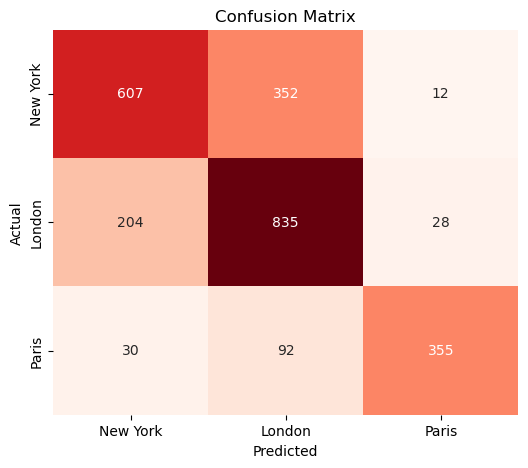

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy score
score = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {round(score * 100, 2)}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Add axis labels
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["New York", "London", "Paris"])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["New York", "London", "Paris"])
plt.show()

## Conclusion: 
As we can see, the classifier predicts tweets that were actually from New York as either New York tweets or London tweets, but almost never Paris tweets. Similarly, the classifier rarely misclassifies the tweets that were actually from Paris. Tweets coming from two English speaking countries are harder to distinguish than tweets in different languages.